# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load Dataset and Inspect

In [2]:
df = pd.read_csv('./enhanced_synthetic_task_dataset.csv')

In [3]:
df

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,NaN,To Do,2025-05-28,9.179174,9.174231
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,NaN,2025-05-02,7.166649,7.679903
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275
...,...,...,...,...,...,...,...,...,...
9995,TASK_09996,difference relationship else artist call truth.,Medium,2025-07-17,NaN,Done,2025-06-01,3.705049,7.161494
9996,TASK_09997,american technology end must second continue s...,Medium,2025-05-02,user_51,To Do,2025-04-19,7.776650,8.180948
9997,TASK_09998,those film last commercial get crime assume po...,Medium,2025-06-21,user_76,In Progress,2025-05-14,7.926030,6.950879
9998,TASK_09999,weight stay positive others than safe spend da...,NaN,2025-05-05,user_66,Blocked,2025-04-20,5.590425,8.717942


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_id           10000 non-null  object 
 1   task_description  9500 non-null   object 
 2   priority          9500 non-null   object 
 3   deadline          10000 non-null  object 
 4   assigned_to       9500 non-null   object 
 5   status            9500 non-null   object 
 6   created_at        10000 non-null  object 
 7   estimated_hours   10000 non-null  float64
 8   actual_hours      10000 non-null  float64
dtypes: float64(2), object(7)
memory usage: 703.3+ KB


In [5]:
df.describe(include='all', datetime_is_numeric=True)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
count,10000,9500,9500,10000,9500,9500,10000,10000.000000,10000.000000
unique,10000,9500,4,118,100,4,60,NaN,NaN
top,TASK_00001,tv long impact need among difference get exper...,Medium,2025-06-07,user_1,To Do,2025-05-22,NaN,NaN
freq,1,1,3733,170,117,3841,203,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.058542,8.062651
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.966391,3.556411
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-4.943395
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.031971,5.666688
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.025836,8.060603
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.034532,10.442068


# Retrieving the first and last 10 rows

In [6]:
df.head(10)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,NaN,To Do,2025-05-28,9.179174,9.174231
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,NaN,2025-05-02,7.166649,7.679903
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275
5,TASK_00006,trial spring human carry perhaps phone week.,Low,2025-06-10,user_23,Blocked,2025-05-27,3.601126,5.683852
6,TASK_00007,NaN,Medium,2025-07-06,user_4,To Do,2025-05-16,4.422873,8.642398
7,TASK_00008,scene return begin region son value protect in...,Medium,2025-05-30,user_4,To Do,2025-04-10,7.818175,6.997669
8,TASK_00009,product health wish partner across represent m...,Medium,2025-04-22,user_68,To Do,2025-04-12,4.575585,6.275073
9,TASK_00010,account my free whose suggest. thanks!,Low,2025-04-09,user_63,NaN,2025-04-07,6.935844,6.766721


In [7]:
df.tail(10)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
9990,TASK_09991,coach argue able cost bring make indeed experi...,Medium,2025-05-12,user_54,Done,2025-04-21,12.266533,13.416074
9991,TASK_09992,half whatever number piece.,Low,2025-05-02,user_94,To Do,2025-04-27,8.635382,9.616211
9992,TASK_09993,list sport she design view language include le...,Medium,2025-04-21,user_33,In Progress,2025-04-12,10.105296,9.325330
9993,TASK_09994,none choice these nature.,NaN,2025-06-13,user_19,To Do,2025-05-04,8.926864,8.087482
9994,TASK_09995,indeed beat see role character strong.,Medium,2025-05-30,user_82,Done,2025-05-12,11.013788,10.978361
9995,TASK_09996,difference relationship else artist call truth.,Medium,2025-07-17,NaN,Done,2025-06-01,3.705049,7.161494
9996,TASK_09997,american technology end must second continue s...,Medium,2025-05-02,user_51,To Do,2025-04-19,7.776650,8.180948
9997,TASK_09998,those film last commercial get crime assume po...,Medium,2025-06-21,user_76,In Progress,2025-05-14,7.926030,6.950879
9998,TASK_09999,weight stay positive others than safe spend da...,NaN,2025-05-05,user_66,Blocked,2025-04-20,5.590425,8.717942
9999,TASK_10000,chance knowledge where close themselves artist...,Medium,2025-06-25,NaN,In Progress,2025-05-02,4.538358,3.279412


### we got to know that some missing and invalid entries lies in the dataset.

### Cleaning the dataset

## 1. Handle Missing Values

In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 task_id               0
task_description    500
priority            500
deadline              0
assigned_to         500
status              500
created_at            0
estimated_hours       0
actual_hours          0
dtype: int64


In [9]:
df.drop_duplicates(inplace=True)
df['task_description'].fillna("No description provided", inplace=True)
df['priority'].fillna(df['priority'].mode()[0], inplace=True)
df['assigned_to'].fillna("unassigned", inplace=True)
df['status'].fillna(df['status'].mode()[0], inplace=True)

In [10]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 task_id             0
task_description    0
priority            0
deadline            0
assigned_to         0
status              0
created_at          0
estimated_hours     0
actual_hours        0
dtype: int64


## 2. Fixing Date Columns

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['deadline'] = pd.to_datetime(df['deadline'])

In [12]:
df.head()

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,unassigned,To Do,2025-05-28,9.179174,9.174231
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,To Do,2025-05-02,7.166649,7.679903
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275


## 3. Feature Engineering

In [13]:
df['days_to_deadline'] = (df['deadline'] - df['created_at']).dt.days
df['on_time'] = (df['actual_hours'] <= df['estimated_hours']).astype(int)

In [14]:
df

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,on_time
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,unassigned,To Do,2025-05-28,9.179174,9.174231,37,1
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465,11,0
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447,59,0
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,To Do,2025-05-02,7.166649,7.679903,53,0
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275,28,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,TASK_09996,difference relationship else artist call truth.,Medium,2025-07-17,unassigned,Done,2025-06-01,3.705049,7.161494,46,0
9996,TASK_09997,american technology end must second continue s...,Medium,2025-05-02,user_51,To Do,2025-04-19,7.776650,8.180948,13,0
9997,TASK_09998,those film last commercial get crime assume po...,Medium,2025-06-21,user_76,In Progress,2025-05-14,7.926030,6.950879,38,1
9998,TASK_09999,weight stay positive others than safe spend da...,Medium,2025-05-05,user_66,Blocked,2025-04-20,5.590425,8.717942,15,0


In [15]:
df['created_dayofweek'] = df['created_at'].dt.dayofweek
df

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,on_time,created_dayofweek
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,unassigned,To Do,2025-05-28,9.179174,9.174231,37,1,2
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465,11,0,6
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447,59,0,0
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,To Do,2025-05-02,7.166649,7.679903,53,0,4
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275,28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TASK_09996,difference relationship else artist call truth.,Medium,2025-07-17,unassigned,Done,2025-06-01,3.705049,7.161494,46,0,6
9996,TASK_09997,american technology end must second continue s...,Medium,2025-05-02,user_51,To Do,2025-04-19,7.776650,8.180948,13,0,5
9997,TASK_09998,those film last commercial get crime assume po...,Medium,2025-06-21,user_76,In Progress,2025-05-14,7.926030,6.950879,38,1,2
9998,TASK_09999,weight stay positive others than safe spend da...,Medium,2025-05-05,user_66,Blocked,2025-04-20,5.590425,8.717942,15,0,6


### Ordinal Encode Priority

In [16]:
priority_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['priority_encoded'] = df['priority'].map(priority_map)
df.head(5)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,on_time,created_dayofweek,priority_encoded
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,unassigned,To Do,2025-05-28,9.179174,9.174231,37,1,2,0.0
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465,11,0,6,1.0
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447,59,0,0,2.0
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,To Do,2025-05-02,7.166649,7.679903,53,0,4,1.0
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275,28,0,1,1.0


### Encode Status

In [17]:
from sklearn.preprocessing import LabelEncoder

status_le = LabelEncoder()
df['status_encoded'] = status_le.fit_transform(df['status'])
df[['status','status_encoded']].head(12)

,status,status_encoded
0,To Do,3
1,To Do,3
2,To Do,3
3,To Do,3
4,In Progress,2
5,Blocked,0
6,To Do,3
7,To Do,3
8,To Do,3
9,To Do,3


### One-hot for Assigned_to (if exists)

In [18]:
if 'assigned_to' in df.columns:
    df = df.join(pd.get_dummies(df['assigned_to'], prefix='assigned'))
df.head(5)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,...,assigned_user_90,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,unassigned,To Do,2025-05-28,9.179174,9.174231,37,...,0,0,0,0,0,0,0,0,0,0
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465,11,...,0,0,0,0,0,0,0,0,0,0
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447,59,...,0,0,0,0,0,0,0,0,0,0
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,To Do,2025-05-02,7.166649,7.679903,53,...,0,0,0,0,0,0,0,0,0,0
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275,28,...,0,0,0,0,0,0,0,0,0,0


# EDA Visualizations

### 1. Priority Distribution

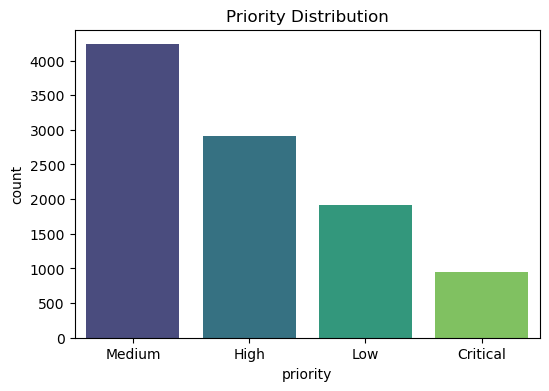

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'priority', order = df['priority'].value_counts().index, palette = 'viridis')
plt.title("Priority Distribution")
plt.show()

### 2. Task Status Distribution

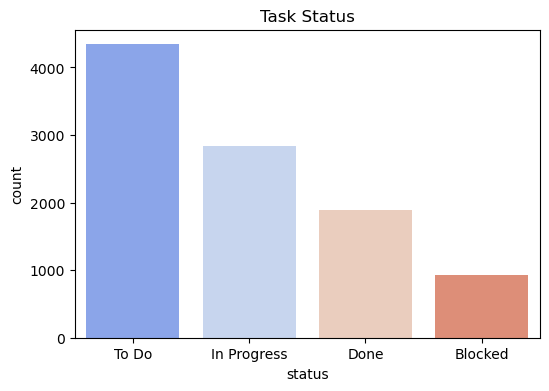

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'status', order = df['status'].value_counts().index, palette = 'coolwarm')
plt.title("Task Status")
plt.show()

### 3. Tasks per User (Top 10)

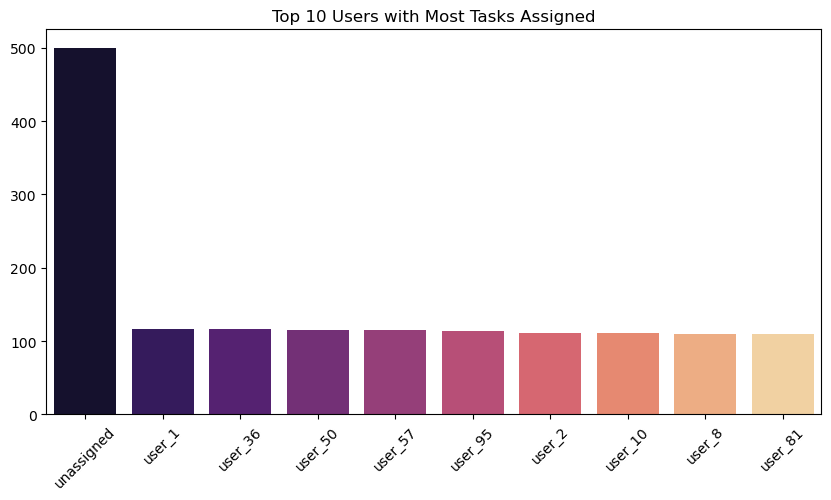

In [21]:
plt.figure(figsize = (10, 5))
top_users = df['assigned_to'].value_counts().head(10)
sns.barplot(x = top_users.index, y = top_users.values, palette = 'magma')
plt.xticks(rotation = 45)
plt.title("Top 10 Users with Most Tasks Assigned")
plt.show()

### 4. Word Cloud of Task Descriptions

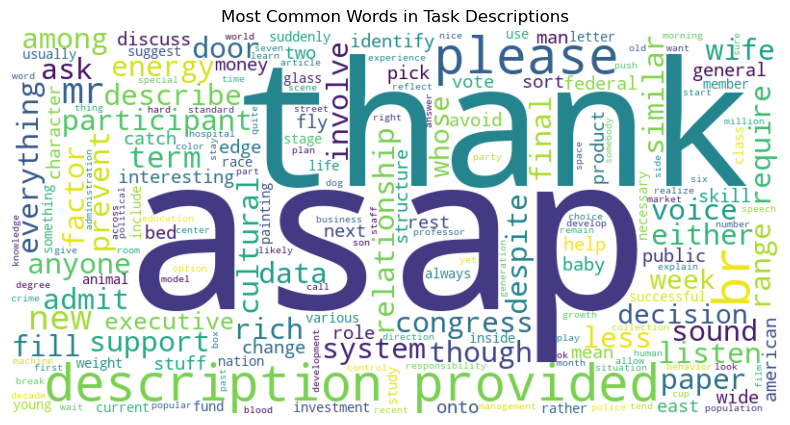

In [22]:
text = " ".join(df['task_description'].dropna().values)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Most Common Words in Task Descriptions")
plt.show()

### 5. Correlation Heatmap

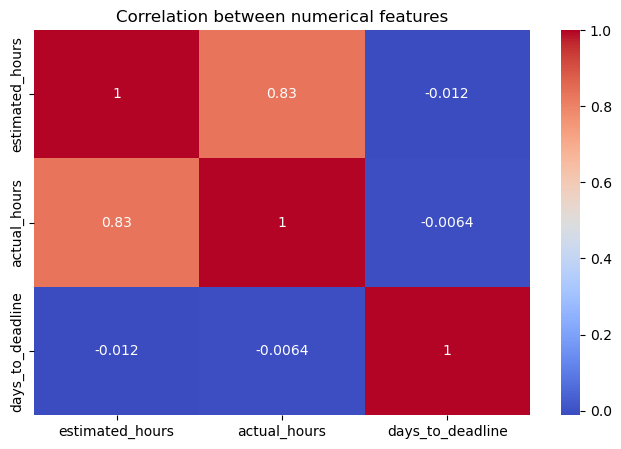

In [23]:
plt.figure(figsize = (8, 5))
sns.heatmap(df[['estimated_hours', 'actual_hours', 'days_to_deadline']].corr(), annot = True, cmap = "coolwarm")
plt.title('Correlation between numerical features')
plt.show()

## Univariate Analysis

### 6. Estimated Hours Distribution

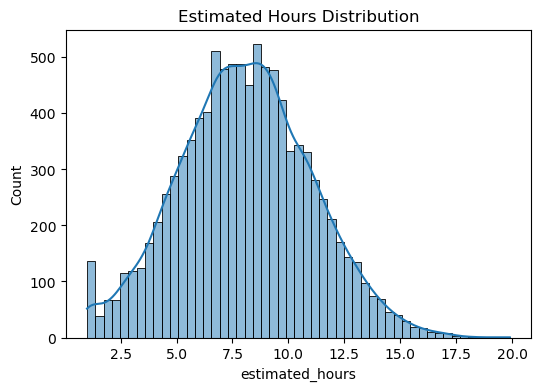

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df['estimated_hours'], kde=True)
plt.title("Estimated Hours Distribution")
plt.show()

### 7. Estimated Hours by Priority

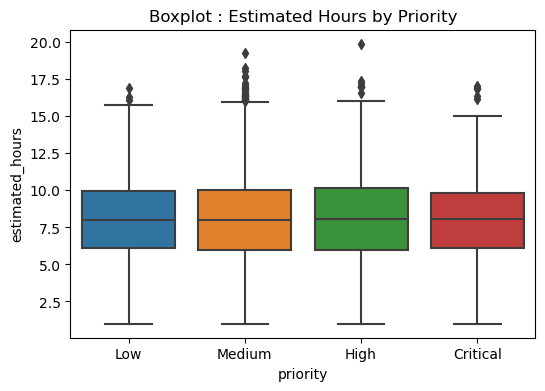

In [25]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'priority', y = 'estimated_hours', data = df)
plt.title('Boxplot : Estimated Hours by Priority')
plt.show()

## Bivariate Analysis

### 8. Estimated vs Actual Hours by Priority

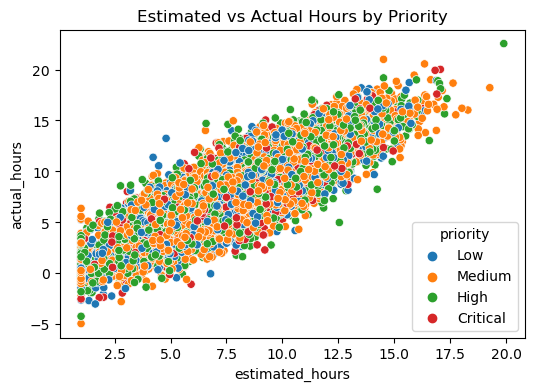

In [26]:
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'estimated_hours', y = 'actual_hours', hue = 'priority', data = df)
plt.title('Estimated vs Actual Hours by Priority')
plt.show()

### 9. Correlation Matrix

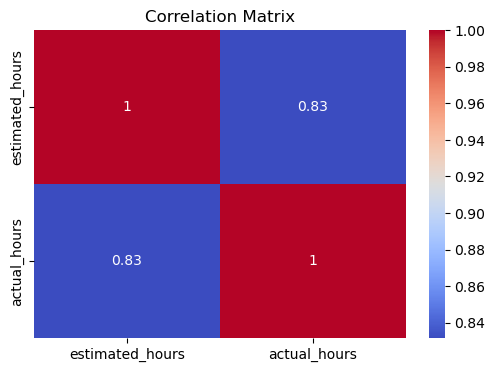

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['estimated_hours', 'actual_hours']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Multivariate Analysis

### 10. Pair Plot of Numerical Features

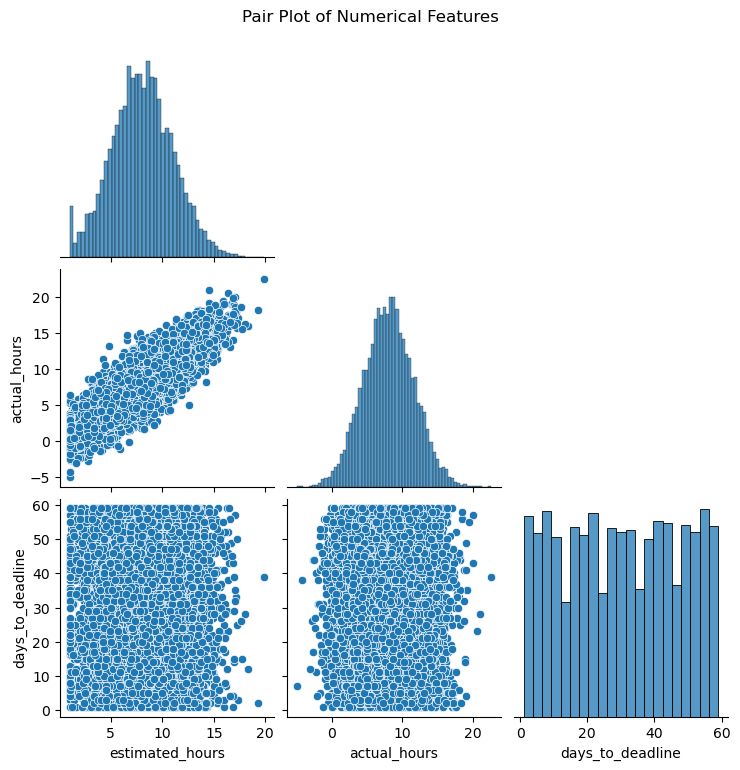

In [28]:
sns.pairplot(df[['estimated_hours', 'actual_hours', 'days_to_deadline']], corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

### 12. Extended Correlation Matrix

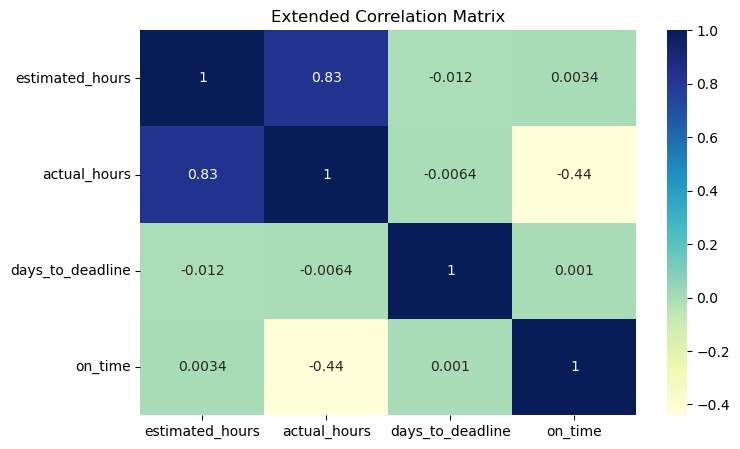

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['estimated_hours', 'actual_hours', 'days_to_deadline', 'on_time']].corr(), annot=True, cmap="YlGnBu")
plt.title("Extended Correlation Matrix")
plt.show()

# NLP Processing

## Importing Libraries

In [30]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
df.head(10)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,...,assigned_user_90,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,unassigned,To Do,2025-05-28,9.179174,9.174231,37,...,0,0,0,0,0,0,0,0,0,0
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465,11,...,0,0,0,0,0,0,0,0,0,0
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447,59,...,0,0,0,0,0,0,0,0,0,0
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,To Do,2025-05-02,7.166649,7.679903,53,...,0,0,0,0,0,0,0,0,0,0
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275,28,...,0,0,0,0,0,0,0,0,0,0
5,TASK_00006,trial spring human carry perhaps phone week.,Low,2025-06-10,user_23,Blocked,2025-05-27,3.601126,5.683852,14,...,0,0,0,0,0,0,0,0,0,0
6,TASK_00007,No description provided,Medium,2025-07-06,user_4,To Do,2025-05-16,4.422873,8.642398,51,...,0,0,0,0,0,0,0,0,0,0
7,TASK_00008,scene return begin region son value protect in...,Medium,2025-05-30,user_4,To Do,2025-04-10,7.818175,6.997669,50,...,0,0,0,0,0,0,0,0,0,0
8,TASK_00009,product health wish partner across represent m...,Medium,2025-04-22,user_68,To Do,2025-04-12,4.575585,6.275073,10,...,0,0,0,0,0,0,0,0,0,0
9,TASK_00010,account my free whose suggest. thanks!,Low,2025-04-09,user_63,To Do,2025-04-07,6.935844,6.766721,2,...,0,0,0,0,0,0,0,0,0,0


## Initializing Tools

In [32]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [33]:
stemmer

<PorterStemmer>

## Preprocessing to task_description column

In [34]:
def preprocess_text(text):
    # 1. Normalize: Lowercase & remove punctuation
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # 2. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 3. Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Apply Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Return Joined and cleaned Text
    return " ".join(stemmed_tokens)

df['cleaned_description'] = df['task_description'].astype(str).apply(preprocess_text)

In [35]:
df[['task_description', 'cleaned_description']].head(10)

,task_description,cleaned_description
0,tv long impact need among difference get exper...,tv long impact need among differ get experi he...
1,everything security institution community stud...,everyth secur institut commun student everyth ...
2,size through do drop everybody. please do it asap,size drop everybodi pleas asap
3,century evening medical wife wonder hit baby. ...,centuri even medic wife wonder hit babi thank
4,church appear score management baby.,church appear score manag babi
5,trial spring human carry perhaps phone week.,trial spring human carri perhap phone week
6,No description provided,descript provid
7,scene return begin region son value protect in...,scene return begin region son valu protect insid
8,product health wish partner across represent m...,product health wish partner across repres meas...
9,account my free whose suggest. thanks!,account free whose suggest thank


## Done with NLP preprocessing on Task Description

### Retrieving the Dataset

In [36]:
df.head(5)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,...,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99,cleaned_description
0,TASK_00001,tv long impact need among difference get exper...,Low,2025-07-04,unassigned,To Do,2025-05-28,9.179174,9.174231,37,...,0,0,0,0,0,0,0,0,0,tv long impact need among differ get experi he...
1,TASK_00002,everything security institution community stud...,Medium,2025-05-15,user_15,To Do,2025-05-04,14.947183,16.873465,11,...,0,0,0,0,0,0,0,0,0,everyth secur institut commun student everyth ...
2,TASK_00003,size through do drop everybody. please do it asap,High,2025-06-05,user_56,To Do,2025-04-07,10.874983,10.951447,59,...,0,0,0,0,0,0,0,0,0,size drop everybodi pleas asap
3,TASK_00004,century evening medical wife wonder hit baby. ...,Medium,2025-06-24,user_44,To Do,2025-05-02,7.166649,7.679903,53,...,0,0,0,0,0,0,0,0,0,centuri even medic wife wonder hit babi thank
4,TASK_00005,church appear score management baby.,Medium,2025-05-13,user_3,In Progress,2025-04-15,5.725363,10.407275,28,...,0,0,0,0,0,0,0,0,0,church appear score manag babi


# Feature Extraction using TF-IDF

##### TF-IDF : TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in NLP to reflect the importance of a word to a document in a collection or corpus. It's a technique that converts text into numerical vectors by multiplying term frequency (TF) with inverse document frequency (IDF).

##### How TF-IDF Works:
       Term Frequency (TF): Measures how often a term appears in a document. 
       Formula: TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d) 
       Inverse Document Frequency (IDF): Measures how important a term is across the entire corpus. 
       Formula: IDF(t) = log\_e (Total number of documents / Number of documents with term t in it) 
##### TF-IDF: The product of TF and IDF, indicating the term's importance within a specific document relative to the entire corpus. 
##### Formula: TF-IDF(t, d) = TF(t, d) * IDF(t) 

### Importing Libraries

In [46]:
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import nltk
import pandas as pd

## 1. TF-IDF Implementation

In [38]:
# Using Cleaned Text
descriptions = df['cleaned_description'].fillna("")

# Initialize and TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features = 300)
x_tfidf = tfidf.fit_transform(descriptions)

#convert to dataframe
tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns = tfidf.get_feature_names_out())


tfidf_df.head()

,accept,across,action,administr,admit,agenc,allow,alway,american,among,...,week,weight,whose,wide,wife,wind,word,world,yet,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.373057,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.325155,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.476781,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### TF (Term Frequency): Counts how often a word appears.

#### IDF (Inverse Document Frequency): Penalizes common words.

#### TF-IDF highlights important but unique words.

## 2. Word2Vec Embedding

#### Each word is mapped to a vector using word context (semantic meaning).

In [39]:
# Tokenize descriptions for Word2Vec
tokenized_text = descriptions.apply(nltk.word_tokenize)


# Train Word2Vec model
w2v_model = Word2Vec(sentences = tokenized_text, vector_size = 100, window = 5, min_count = 2, workers = 4)


# Function to convert description to vector (mean of word vectors)
def get_vector(doc):
    if not doc:
        return np.zeroes(100)
    
    vectors = [w2v_model.wv[word] for word in doc if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)


# Apply on entire dataset
df['w2v_vector'] = tokenized_text.apply(get_vector)


# Example: view first vector
print("Vector shape:", df['w2v_vector'][0].shape)
print(df['w2v_vector'][0])

Vector shape: (100,)
[-0.0923801   0.095632    0.22438976  0.05939078  0.11852202 -0.19495484
 -0.13222955  0.46139482 -0.07443268  0.00765027 -0.20157625 -0.24167816
 -0.01946144  0.0708774  -0.11507726 -0.08203766 -0.01008812 -0.0962007
  0.03189134 -0.36437204  0.07333733  0.14003643 -0.03593222 -0.0673174
 -0.08964745  0.04358367 -0.29079664 -0.19411562 -0.05953386  0.05114781
  0.3166583   0.14826658  0.04142365  0.13934422 -0.14849006  0.12835202
 -0.06394131 -0.3838448  -0.10945996 -0.41606745 -0.09977773 -0.10790336
  0.08859961 -0.07559334  0.09744482 -0.18545726 -0.09781294  0.04490421
  0.2634304   0.0338269   0.043325   -0.17672263 -0.07345363 -0.03473342
 -0.25458917  0.11058627  0.20965372 -0.02574654 -0.22448976  0.04523725
  0.14860727  0.14859618 -0.2053914  -0.04309154 -0.26183355 -0.00451718
  0.00572973  0.04795123 -0.2562834   0.06524932 -0.15981197  0.01304398
  0.21400763 -0.16186197  0.01239277  0.19244179 -0.02072914 -0.1612764
 -0.1251012   0.1084607  -0.07567

## 3. BERT Embedding (Transformer-Based Model)
#### BERT gives context-aware embeddings using pre-trained deep models.

In [48]:
from sentence_transformers import SentenceTransformer

# Load pre-trained BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate BERT embeddings for each task description
bert_embeddings = bert_model.encode(descriptions.tolist(), show_progress_bar=True)

# Convert to DataFrame
bert_df = pd.DataFrame(bert_embeddings)
print("BERT Embedding shape:", bert_df.shape)
print(bert_df.head(10))

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

BERT Embedding shape: (10000, 384)
        0         1         2         3         4         5         6    \
0  0.013566 -0.091952 -0.012539 -0.097727  0.046238  0.043405 -0.016902   
1  0.001546 -0.032951  0.036929 -0.109316 -0.050205  0.016493  0.017704   
2  0.011853  0.063043  0.037300  0.038136  0.032102 -0.010272  0.047148   
3 -0.036264  0.045461 -0.020238 -0.040088 -0.063909  0.019100  0.090050   
4  0.026343  0.057112 -0.037261  0.017075 -0.066284  0.117224  0.003703   
5 -0.071653  0.048192  0.037823 -0.069991 -0.097028 -0.009727 -0.000992   
6 -0.070209 -0.011973  0.003296 -0.035732  0.061935 -0.003403  0.126101   
7 -0.037382  0.065242 -0.037520 -0.082405  0.044452  0.038890  0.035338   
8 -0.046922  0.014748  0.015051 -0.085102 -0.017490  0.038530  0.042783   
9 -0.086374 -0.034542  0.046301 -0.009426  0.054338  0.004896  0.118628   

        7         8         9    ...       374       375       376       377  \
0  0.056952 -0.072403 -0.004365  ...  0.008164  0.027224 -0